<a href="https://colab.research.google.com/github/jonas-richter/tara_guidi2016_data/blob/data_exploration/Tara_environmental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore data from Tara oceans project

In [85]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.express as px
## ML
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [74]:
url = 'https://github.com/jonas-richter/tara_guidi2016_data/blob/data_exploration/data/SI4_environmental_data.tsv?raw=true'
df = pd.read_csv(url, on_bad_lines='skip', sep='\t', header = 0)

## Acronyms
*   Sample: Sample ID
*   Latitude: Latitude
*   Salinity: Salinity
*   NO2 (umol/L): NO2 concentration
*   PO4 (umol/L): PO4 concentration
*   NO2NO3 (umol/L): NO2NO3 concentration
*   Mean Chloro HPLC adjusted (mg Chl/m3): Chlorophyll concentration
*   Mean Temperature deg C: Temperature in degree Celsius
*   Mean Oxygen adjusted (umol/Kg): Oxygen concentration
*   Mean Flux at 150m: Carbon flux at 150m
*   NPP 8d VGPM (mgC/m2/day): NPP weekly average (VGPM model)

In [75]:
df.info

<bound method DataFrame.info of       Sample   Latitude  Longitude   Salinity  NO2 (umol/L)  PO4 (umol/L)  \
0      S4DCM  36.573000  -6.538667  36.556443           NaN           NaN   
1      S4SUR  36.553333  -6.566833  36.632400           NaN           NaN   
2      S7DCM  37.038683   1.949833        NaN          0.00          0.01   
3      S7SUR  37.021067   1.949467  37.491100          0.00          0.06   
4      S9DCM  39.073400   5.859833  37.823200          0.02          0.02   
..       ...        ...        ...        ...           ...           ...   
99   S150SUR  35.907050 -37.260950  36.312300          0.04          0.01   
100  S151DCM  36.194437 -28.882892  36.162887          0.01          0.01   
101  S151SUR  36.155767 -29.008900  36.237750          0.02          0.01   
102  S152DCM  43.739633 -16.882796  35.989700          0.32          0.17   
103  S152SUR  43.687600 -16.851517  35.986042          0.31          0.16   

     NO2NO3 (umol/L)  Mean Chloro HPLC adju

In [76]:
df.columns

Index(['Sample', 'Latitude', 'Longitude', 'Salinity', 'NO2 (umol/L)',
       'PO4 (umol/L)', 'NO2NO3 (umol/L)',
       'Mean Chloro HPLC adjusted (mg Chl/m3)', 'Mean Temperature deg C',
       'Mean Oxygen adjusted (umol/Kg)', 'Mean Flux at 150m',
       'NPP 8d VGPM (mgC/m2/day)'],
      dtype='object')

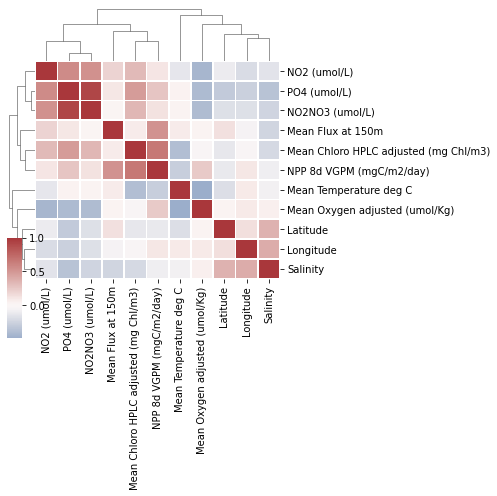

In [77]:
sns.clustermap(df.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(7, 7))

## Lessons from correlation plot
*   Samples with high NO2 concentration also tend to have high PO4 and NO2NO3 concentration
*   Very high positive correlation between PO4 and NO2NO3 concentration
*   Mean flux at 150 m positively correlates with NPP 8d VGPM (mgC/m2/day)
*   Mean Chloro HPLC adjusted (mg Chl/m3) positively correlates primarily with NPP 8d VGPM (mgC/m2/day)
*   Mean temperature negatively correlates primarily with mean oxygen adjusted (µnmol/kg)
*   Salinity shows primarily a rather weak negative correlation to PO4 concentration
*   Mean oxygen adjusted exerts a weak positive correlation to NPP 8d VGPM (mgC/m2/day) and negatively correlates with mean temperature, and concentrations of NO2, PO4, NO2NO3

# Eukaryotic lineages
SI5_eukaryotic_lineages.tsv: Supplementary Table 5 containing eukaryotic lineages and their correlations as computed using sparse PLS regression (sPLS)

In [78]:
# read data
euk = pd.read_csv('https://github.com/jonas-richter/tara_guidi2016_data/blob/data_exploration/data/SI5_eukaryotic_lineages.tsv?raw=true',
                  on_bad_lines='skip', sep='\t', header = 0)

In [79]:
#euk.iloc[[0,1,2,3,4], [0,1,2,3,4]]
euk.loc[[0,1,2,3,4,5]]

Eukaryotic lineages  Latitude  Longitude  \
0            Collodaria_Sphaerozoum+punctatum -0.290778  -0.342873   
1            Other_Chlorophyta_Pycnococcaceae  0.242449   0.295115   
2            MAST-4-6-7-8-9-10-11_MAST-7D+sp.  0.282508   0.278425   
3           Telonemia_Telonemia-Group-1_X+sp. -0.242103  -0.239775   
4  Basidiomycota_Rhodosporidium+sphaerocarpum -0.174427  -0.157652   
5                      Haptophyta_Phaeocystis -0.316448  -0.384610   

   Temperature  Salinity    Oxygen  Chlorophyll  Carbon export       NO2  \
0    -0.026508 -0.285229 -0.149053     0.244520      -0.037205  0.234611   
1    -0.022078  0.274851  0.172644    -0.233683      -0.019595 -0.239301   
2     0.287570  0.057679 -0.141805    -0.060945       0.336104  0.030936   
3    -0.240838 -0.054126  0.115390     0.056009      -0.281614 -0.020971   
4    -0.245786  0.021577  0.162252    -0.008401      -0.285693 -0.086567   
5     0.026046 -0.356418 -0.222305     0.303138       0.022401  0.309600   

        PO4    NO2NO3       NPP  
0  0.259532  0.220909 -0.095176  
1 -0.271284 -0.227694  0.046180  
2  0.073125  0.043174  0.289077  
3 -0.055705 -0.031482 -0.243525  
4 -0.129921 -0.093843 -0.229723  
5  0.350643  0.294462 -0.062355

In [80]:
euk.columns

Index(['Eukaryotic lineages', 'Latitude', 'Longitude', 'Temperature',
       'Salinity', 'Oxygen', 'Chlorophyll', 'Carbon export', 'NO2', 'PO4',
       'NO2NO3', 'NPP'],
      dtype='object')

In [86]:
# make Eukaryotic lineages as row name
euk_2 = euk.set_index('Eukaryotic lineages')

# sort df
euk_sort = euk_2.sort_values(by='Temperature')

# plot
px.imshow(euk_sort, aspect = 3)